In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

df = pd.read_excel('df full features.xlsx')
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:

# Split the DataFrame into train and test sets
train_df = df[df['Date'] < '2024-11-07']
test_df = df[df['Date'] >= '2024-11-07']

# Separate features and target
X_train = train_df.drop(columns=['Unnamed: 0', 'Country', 'City', 'Date', 'Label'])
y_train = train_df['Label']
X_test = test_df.drop(columns=['Unnamed: 0', 'Country', 'City', 'Date', 'Label'])
y_test = test_df['Label']

# Scale the features (excluding the 'Label' column)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:



# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')

print("Decision Tree Metrics:")
print(f"Accuracy: {dt_accuracy}")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"F1-Score: {dt_f1}")
print()

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1-Score: {rf_f1}")
print()

# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
xgb_predictions = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions, average='weighted')
xgb_recall = recall_score(y_test, xgb_predictions, average='weighted')
xgb_f1 = f1_score(y_test, xgb_predictions, average='weighted')

print("XGBoost Metrics:")
print(f"Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1-Score: {xgb_f1}")

Decision Tree Metrics:
Accuracy: 0.782608695652174
Precision: 0.8662207357859532
Recall: 0.782608695652174
F1-Score: 0.7867494824016563

Random Forest Metrics:
Accuracy: 0.9565217391304348
Precision: 0.9613526570048309
Recall: 0.9565217391304348
F1-Score: 0.9570508863215451

XGBoost Metrics:
Accuracy: 0.9130434782608695
Precision: 0.9304347826086956
Recall: 0.9130434782608695
F1-Score: 0.9147688060731538


Label Distribution in Training Set:
Label
1    75
0    75
Name: count, dtype: int64


<ipython-input-5-31f9f4449a31>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=train_df, palette='viridis')


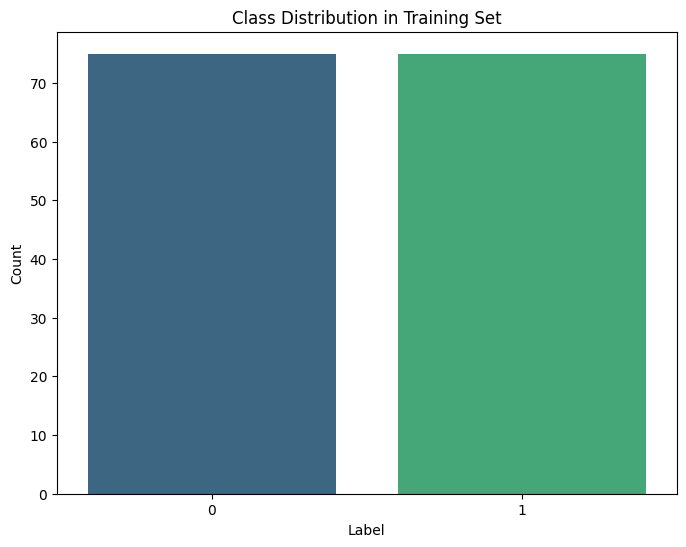

In [5]:

# Check the distribution of the 'Label' column
label_distribution = train_df['Label'].value_counts()

# Print the distribution
print("Label Distribution in Training Set:")
print(label_distribution)

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=train_df, palette='viridis')
plt.title('Class Distribution in Training Set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [6]:
df1 = pd.DataFrame({'True labels': y_test,'Decision tree': dt_predictions, 'Random forest': rf_predictions,'XGBoost': xgb_predictions})
df1

,True labels,Decision tree,Random forest,XGBoost
150,1,1,1,1
151,0,1,0,0
152,1,1,1,1
153,0,1,1,1
154,1,1,1,1
155,1,1,1,1
156,0,0,0,0
157,0,0,0,0
158,1,1,1,1
159,1,1,1,1


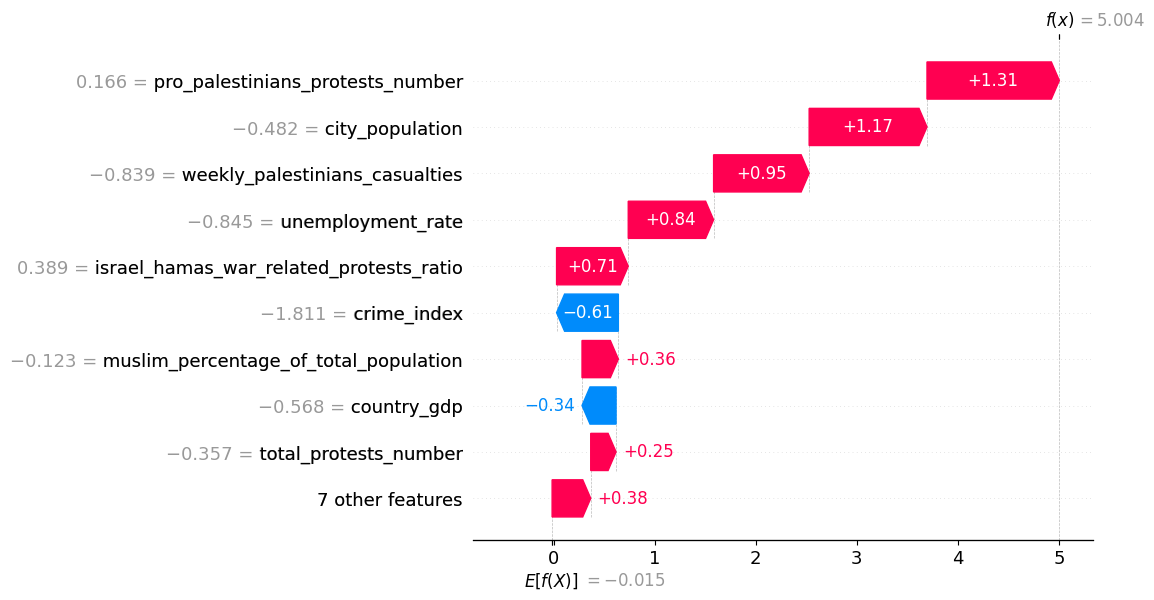

In [17]:
import shap

# Initialize SHAP explainer with model_output="raw"
explainer = shap.TreeExplainer(xgb_model, model_output="raw")
shap_values = explainer.shap_values(X_test_scaled)

# Create an Explanation object
explanation = shap.Explanation(
    values=shap_values,  # SHAP values
    base_values=explainer.expected_value,  # Base value (expected model output)
    data=X_test_scaled,  # Feature values
    feature_names=X_train.columns  # Feature names
)


first_data_point = 0

shap.plots.waterfall(explanation[first_data_point])